# Reality of the Cylindrical Gravitational Waves of Einstein & Rosen by Weber and Wheeler
##  Geoff Cope
##  Univeristy of Utah
##  December 31, 2021

https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.29.509

https://www.youtube.com/watch?v=dVEcHoaSifM

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
T,rho,phi,z,dT,drho,dphi,dz = symbols( 'T rho phi z dT drho dphi dz' )

In [4]:
psi = Function('psi')(rho,T)
psi

In [5]:
gamma = Function('gamma')(rho,T)
gamma

In [6]:
variables = Matrix( [T,rho,phi,z] )
variables

⎡T⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dT,drho,dphi,dz] ) 
differentials

⎡ dT ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand(  exp(2*(gamma-psi))*(-dT**2 - drho**2) + rho**2 * exp(-2*psi) * dphi**2 +exp(2*psi)*dz**2 )
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(ρ, T)  -2⋅ψ(ρ, T)                                                     ⎤
⎢-ℯ         ⋅ℯ                       0                   0             0     ⎥
⎢                                                                            ⎥
⎢                           2⋅γ(ρ, T)  -2⋅ψ(ρ, T)                            ⎥
⎢           0             -ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                            ⎥
⎢                                                   2  -2⋅ψ(ρ, T)            ⎥
⎢           0                        0             ρ ⋅ℯ                0     ⎥
⎢                                                                            ⎥
⎢                                                                   2⋅ψ(ρ, T)⎥
⎣           0                        0                   0         ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  2⋅γ(ρ, T)  -2⋅ψ(ρ, T)                                                     ⎤
⎢-ℯ         ⋅ℯ                       0                   0             0     ⎥
⎢                                                                            ⎥
⎢                           2⋅γ(ρ, T)  -2⋅ψ(ρ, T)                            ⎥
⎢           0             -ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                            ⎥
⎢                                                   2  -2⋅ψ(ρ, T)            ⎥
⎢           0                        0             ρ ⋅ℯ                0     ⎥
⎢                                                                            ⎥
⎢                                                                   2⋅ψ(ρ, T)⎥
⎣           0                        0                   0         ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("T rho phi z")
t,rho,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢⎡ ⎛     2⋅γ(ρ, T)  -2⋅ψ(ρ, T) ∂                2⋅γ(ρ, T)  -2⋅ψ(ρ, T) ∂          ⎞  -2⋅γ(ρ, 
⎢⎢-⎜- 2⋅ℯ         ⋅ℯ          ⋅──(γ(ρ, T)) + 2⋅ℯ         ⋅ℯ          ⋅──(ψ(ρ, T))⎟⋅ℯ        
⎢⎢ ⎝                           ∂T                                     ∂T         ⎠          
⎢⎢──────────────────────────────────────────────────────────────────────────────────────────
⎢⎢                                                   2                                      
⎢⎢                                                                                          
⎢⎢ ⎛     2⋅γ(ρ, T)  -2⋅ψ(ρ, T) ∂                2⋅γ(ρ, T)  -2⋅ψ(ρ, T) ∂          ⎞  -2⋅γ(ρ, 
⎢⎢-⎜- 2⋅ℯ         ⋅ℯ          ⋅──(γ(ρ, T)) + 2⋅ℯ         ⋅ℯ          ⋅──(ψ(ρ, T))⎟⋅ℯ        
⎢⎢ ⎝                           ∂ρ                                     ∂ρ         ⎠          
⎢⎢────────────────────────────────────────────────────────────────────

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛    2              2                           2     2              2         ⎞         
⎢  ⎜   ∂              ∂               ⎛∂          ⎞     ∂              ∂          ⎟   ∂     
⎢ρ⋅⎜- ───(γ(ρ, T)) - ───(γ(ρ, T)) - 2⋅⎜──(ψ(ρ, T))⎟  + ───(ψ(ρ, T)) + ───(ψ(ρ, T))⎟ - ──(γ(ρ
⎢  ⎜    2              2              ⎝∂T         ⎠      2              2         ⎟   ∂ρ    
⎢  ⎝  ∂T             ∂ρ                                ∂T             ∂ρ          ⎠         
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                      ρ                                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                ∂    

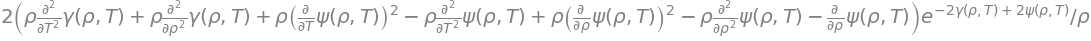

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛    2              2                           2     2              2         ⎞         
⎢  ⎜   ∂              ∂               ⎛∂          ⎞     ∂              ∂          ⎟   ∂     
⎢ρ⋅⎜- ───(γ(ρ, T)) - ───(γ(ρ, T)) - 2⋅⎜──(ψ(ρ, T))⎟  + ───(ψ(ρ, T)) + ───(ψ(ρ, T))⎟ - ──(γ(ρ
⎢  ⎜    2              2              ⎝∂T         ⎠      2              2         ⎟   ∂ρ    
⎢  ⎝  ∂T             ∂ρ                                ∂T             ∂ρ          ⎠         
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                      ρ                                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                        ∂                                                ∂ 
⎢               2                    2   ──(γ(ρ, T))                                      ──
⎢  ⎛∂          ⎞        ⎛∂          ⎞    ∂ρ                     ∂           ∂             ∂T
⎢- ⎜──(ψ(ρ, T))⎟  + 1.0⋅⎜──(ψ(ρ, T))⎟  - ───────────        - 2⋅──(ψ(ρ, T))⋅──(ψ(ρ, T)) + ──
⎢  ⎝∂T         ⎠        ⎝∂ρ         ⎠         ρ                 ∂T          ∂ρ              
⎢                                                                                           
⎢                                   ∂                                                       
⎢                                   ──(γ(ρ, T))                        2                2   
⎢         ∂           ∂             ∂T                    ⎛∂          ⎞    ⎛∂          ⎞    
⎢     - 2⋅──(ψ(ρ, T))⋅──(ψ(ρ, T)) + ───────────       1.0⋅⎜──(ψ(ρ, T))⎟  - ⎜──(ψ(ρ, T))⎟  + 
⎢         ∂T          ∂ρ                 ρ                ⎝∂T         

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡    ⎛  2              2                           2     2              2         ⎞         
⎢    ⎜ ∂              ∂               ⎛∂          ⎞     ∂              ∂          ⎟   ∂     
⎢- ρ⋅⎜───(γ(ρ, T)) + ───(γ(ρ, T)) + 2⋅⎜──(ψ(ρ, T))⎟  - ───(ψ(ρ, T)) - ───(ψ(ρ, T))⎟ - ──(γ(ρ
⎢    ⎜  2              2              ⎝∂T         ⎠      2              2         ⎟   ∂ρ    
⎢    ⎝∂T             ∂ρ                                ∂T             ∂ρ          ⎠         
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                      ρ                                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                ∂    

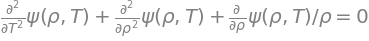

In [23]:
equation2 = Eq( expand( (1/rho)*Ric.tensor()[3,3].args[1] ) ,0)
equation2

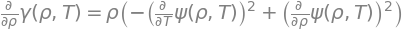

In [24]:
equation3 = Eq(diff(gamma,rho) , solve(einst.tensor()[0,0], diff(gamma,rho) )[0] ) 
equation3

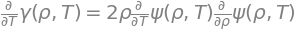

In [25]:
equation4 = Eq(diff(gamma,T) , solve( ricciSimplified[1,0] , diff(gamma,T) )[0] ) 
equation4

In [27]:
vacuumFieldEquations = Matrix([equation2,equation3,equation4])
vacuumFieldEquations

⎡                                 ∂                 ⎤
⎢     2              2            ──(ψ(ρ, T))       ⎥
⎢    ∂              ∂             ∂ρ                ⎥
⎢   ───(ψ(ρ, T)) + ───(ψ(ρ, T)) + ─────────── = 0   ⎥
⎢     2              2                 ρ            ⎥
⎢   ∂T             ∂ρ                               ⎥
⎢                                                   ⎥
⎢                ⎛               2                2⎞⎥
⎢∂               ⎜  ⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(ρ, T)) = ρ⋅⎜- ⎜──(ψ(ρ, T))⎟  + ⎜──(ψ(ρ, T))⎟ ⎟⎥
⎢∂ρ              ⎝  ⎝∂T         ⎠    ⎝∂ρ         ⎠ ⎠⎥
⎢                                                   ⎥
⎢     ∂                 ∂           ∂               ⎥
⎢     ──(γ(ρ, T)) = 2⋅ρ⋅──(ψ(ρ, T))⋅──(ψ(ρ, T))     ⎥
⎣     ∂T                ∂T          ∂ρ              ⎦

In [28]:
from sympy import *

In [29]:
X, Y = map(Function, 'XY')

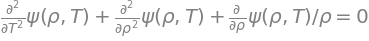

In [30]:
eq = vacuumFieldEquations[0]
eq

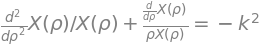

In [36]:
xODE = Eq(pde_separate( eq, psi, [X(rho),Y(T)])[0] ,- k**2 ) 
xODE

In [37]:
xSolution = dsolve( xODE , X(rho))
xSolution 

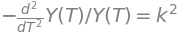

In [38]:
yODE = Eq( pde_separate( eq, psi, [X(rho),Y(T)])[1] ,  k**2 ) 
yODE

In [39]:
ySolution = dsolve( yODE , Y(T))
ySolution 